# Comparing PyWGCNA objects external gene lists
PyWGCNA provides tools to determine if gene signatures are present in each found module. This is useful in cases such as determining whether modules that are found in bulk RNA-seq data are driven by specific cell types found in single-cell or single-nucleus RNA-seq data. In this example, this is exactly what we will do.

## Read PyWGCNA object
First, read the PyWGCNA object using the `readWGCNA()` function, and load in your marker gene table.

In [1]:
import PyWGCNA
pyWGCNA_3xTgAD = PyWGCNA.readWGCNA("3xTgAD_paper/3xTgAD.p")

Reading 3xTgAD WGCNA done!


## Read marker gene list

The marker gene table should have genes as the row index and a column called `moduleColors`, which should correspond to the groups that you want to use in your single cell data. In most cases, this will correspond to a cluster or cell type found in the single-cell data.

In [2]:
import pandas as pd
sn_3xTgAD = pd.read_csv("3xTgAD_paper/sn_cluster_3xTgAD.csv", index_col=0)
sn_3xTgAD["moduleColors"] = "N" + sn_3xTgAD["cluster"].astype(str)
sn_3xTgAD.head(5)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene,gene_id,cellType,moduleColors
Gm28928,0.0,2.197190,0.579,0.102,0.0,1,Gm28928,Gm28928,Neuron,N1
ENSMUSG00000059742,0.0,1.902920,0.801,0.227,0.0,1,Kcnh7,ENSMUSG00000059742,Neuron,N1
ENSMUSG00000028399,0.0,1.887287,0.990,0.528,0.0,1,Ptprd,ENSMUSG00000028399,Neuron,N1
ENSMUSG00000062991,0.0,1.800752,0.845,0.261,0.0,1,Nrg1,ENSMUSG00000062991,Neuron,N1
ENSMUSG00000056158,0.0,1.735965,0.599,0.150,0.0,1,Car10,ENSMUSG00000056158,Neuron,N1


## Comparing PyWGCNA object to single-cell/nucleus gene marker table
After reading the objects and table, call the `compareSingleCell()` function on the PyWGCNA object and sn/sc table. The results will be stored as a table in the `comparison` variable.

In [3]:
comparison = PyWGCNA.compareSingleCell(PyWGCNAs=[pyWGCNA_3xTgAD], 
                                       sc=sn_3xTgAD)

### Jaccard similarity matrix

In [4]:
comparison.jaccard_similarity.head(5)

,3xTgAD:rosybrown,3xTgAD:white,3xTgAD:gainsboro,3xTgAD:brown,3xTgAD:darkgrey,3xTgAD:darkred,3xTgAD:black,3xTgAD:darksalmon,3xTgAD:maroon,3xTgAD:firebrick,...,single_cell:N22,single_cell:N23,single_cell:N24,single_cell:N25,single_cell:N26,single_cell:N27,single_cell:N28,single_cell:N29,single_cell:N30,single_cell:N31
3xTgAD:rosybrown,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.006137,0.003687,0.003010,0.006279,0.001710,0.024962,0.024848,0.010920,0.015577,0.019370
3xTgAD:white,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.001704,0.001883,0.002028,0.003484,0.000000,0.003497,0.000000,0.005450,0.003636,0.010787
3xTgAD:gainsboro,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.019410,0.005639,0.003807,0.007410,0.006135,0.014180,0.060881,0.015867,0.051309,0.018855
3xTgAD:brown,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001538,0.005319,0.000000,0.000000
3xTgAD:darkgrey,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.001876,0.002096,0.000000,0.007722,0.000000,0.002484,0.000000,0.005882,0.000000,0.002270


### Fraction matrix

In [5]:
comparison.fraction.head(5)

,3xTgAD:rosybrown,3xTgAD:white,3xTgAD:gainsboro,3xTgAD:brown,3xTgAD:darkgrey,3xTgAD:darkred,3xTgAD:black,3xTgAD:darksalmon,3xTgAD:maroon,3xTgAD:firebrick,...,single_cell:N22,single_cell:N23,single_cell:N24,single_cell:N25,single_cell:N26,single_cell:N27,single_cell:N28,single_cell:N29,single_cell:N30,single_cell:N31
3xTgAD:rosybrown,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,58.441558,55.102041,73.333333,64.788732,53.191489,85.714286,63.778163,52.960526,58.375635,57.057654
3xTgAD:white,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.649351,1.020408,1.666667,1.408451,0.000000,0.702576,0.000000,1.315789,0.761421,1.988072
3xTgAD:gainsboro,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,33.766234,15.306122,16.666667,14.084507,34.042553,9.836066,31.369151,14.802632,36.802030,11.332008
3xTgAD:brown,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.173310,0.657895,0.000000,0.000000
3xTgAD:darkgrey,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,...,0.649351,1.020408,0.000000,2.816901,0.000000,0.468384,0.000000,1.315789,0.000000,0.397614


### P-value matrix

In [6]:
comparison.P_value.head(5)

,3xTgAD:rosybrown,3xTgAD:white,3xTgAD:gainsboro,3xTgAD:brown,3xTgAD:darkgrey,3xTgAD:darkred,3xTgAD:black,3xTgAD:darksalmon,3xTgAD:maroon,3xTgAD:firebrick,...,single_cell:N22,single_cell:N23,single_cell:N24,single_cell:N25,single_cell:N26,single_cell:N27,single_cell:N28,single_cell:N29,single_cell:N30,single_cell:N31
3xTgAD:rosybrown,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.805025e-03,0.002662,0.576099,0.313269,0.025194,2.914125e-15,3.886588e-03,1.654726e-09,3.142082e-06,3.379395e-09
3xTgAD:white,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.832771e-01,0.725925,1.000000,1.000000,1.000000,3.874783e-02,8.911280e-06,3.012947e-01,7.127592e-02,1.000000e+00
3xTgAD:gainsboro,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.567871e-12,0.352766,0.429002,0.519509,0.000087,1.356121e-01,6.299327e-35,2.166390e-01,9.913859e-37,5.817334e-01
3xTgAD:brown,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000000e+00,1.000000,1.000000,1.000000,1.000000,4.087737e-01,2.710378e-01,1.000000e+00,6.508921e-01,4.264463e-01
3xTgAD:darkgrey,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.335298e-01,1.000000,0.629768,0.329368,1.000000,2.708593e-02,4.356671e-05,3.841097e-01,1.595276e-03,1.859808e-03


## Plotting results
There are two options to plot the results:
1. Display the Jaccard similarity matrix as a graph by using `plot_jaccard_similarity()` function.
2. Display all three matrices at once using `plotHeatmapComparison()` function.

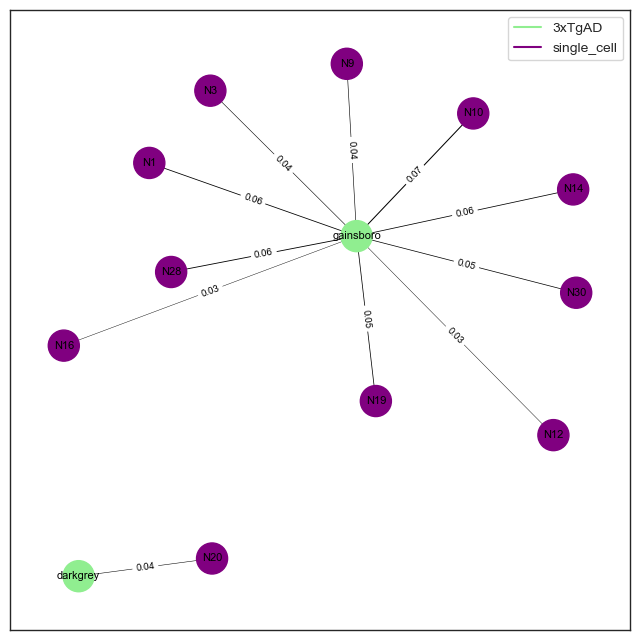

In [13]:
color = {"3xTgAD": "lightgreen", 
         "single_cell": "purple"}
comparison.plotJaccardSimilarity(color=color,
                                 cutoff=0.03,
                                 plot_format="pdf",
                                 file_name="jaccard_similarity_3xTgAD_sn")

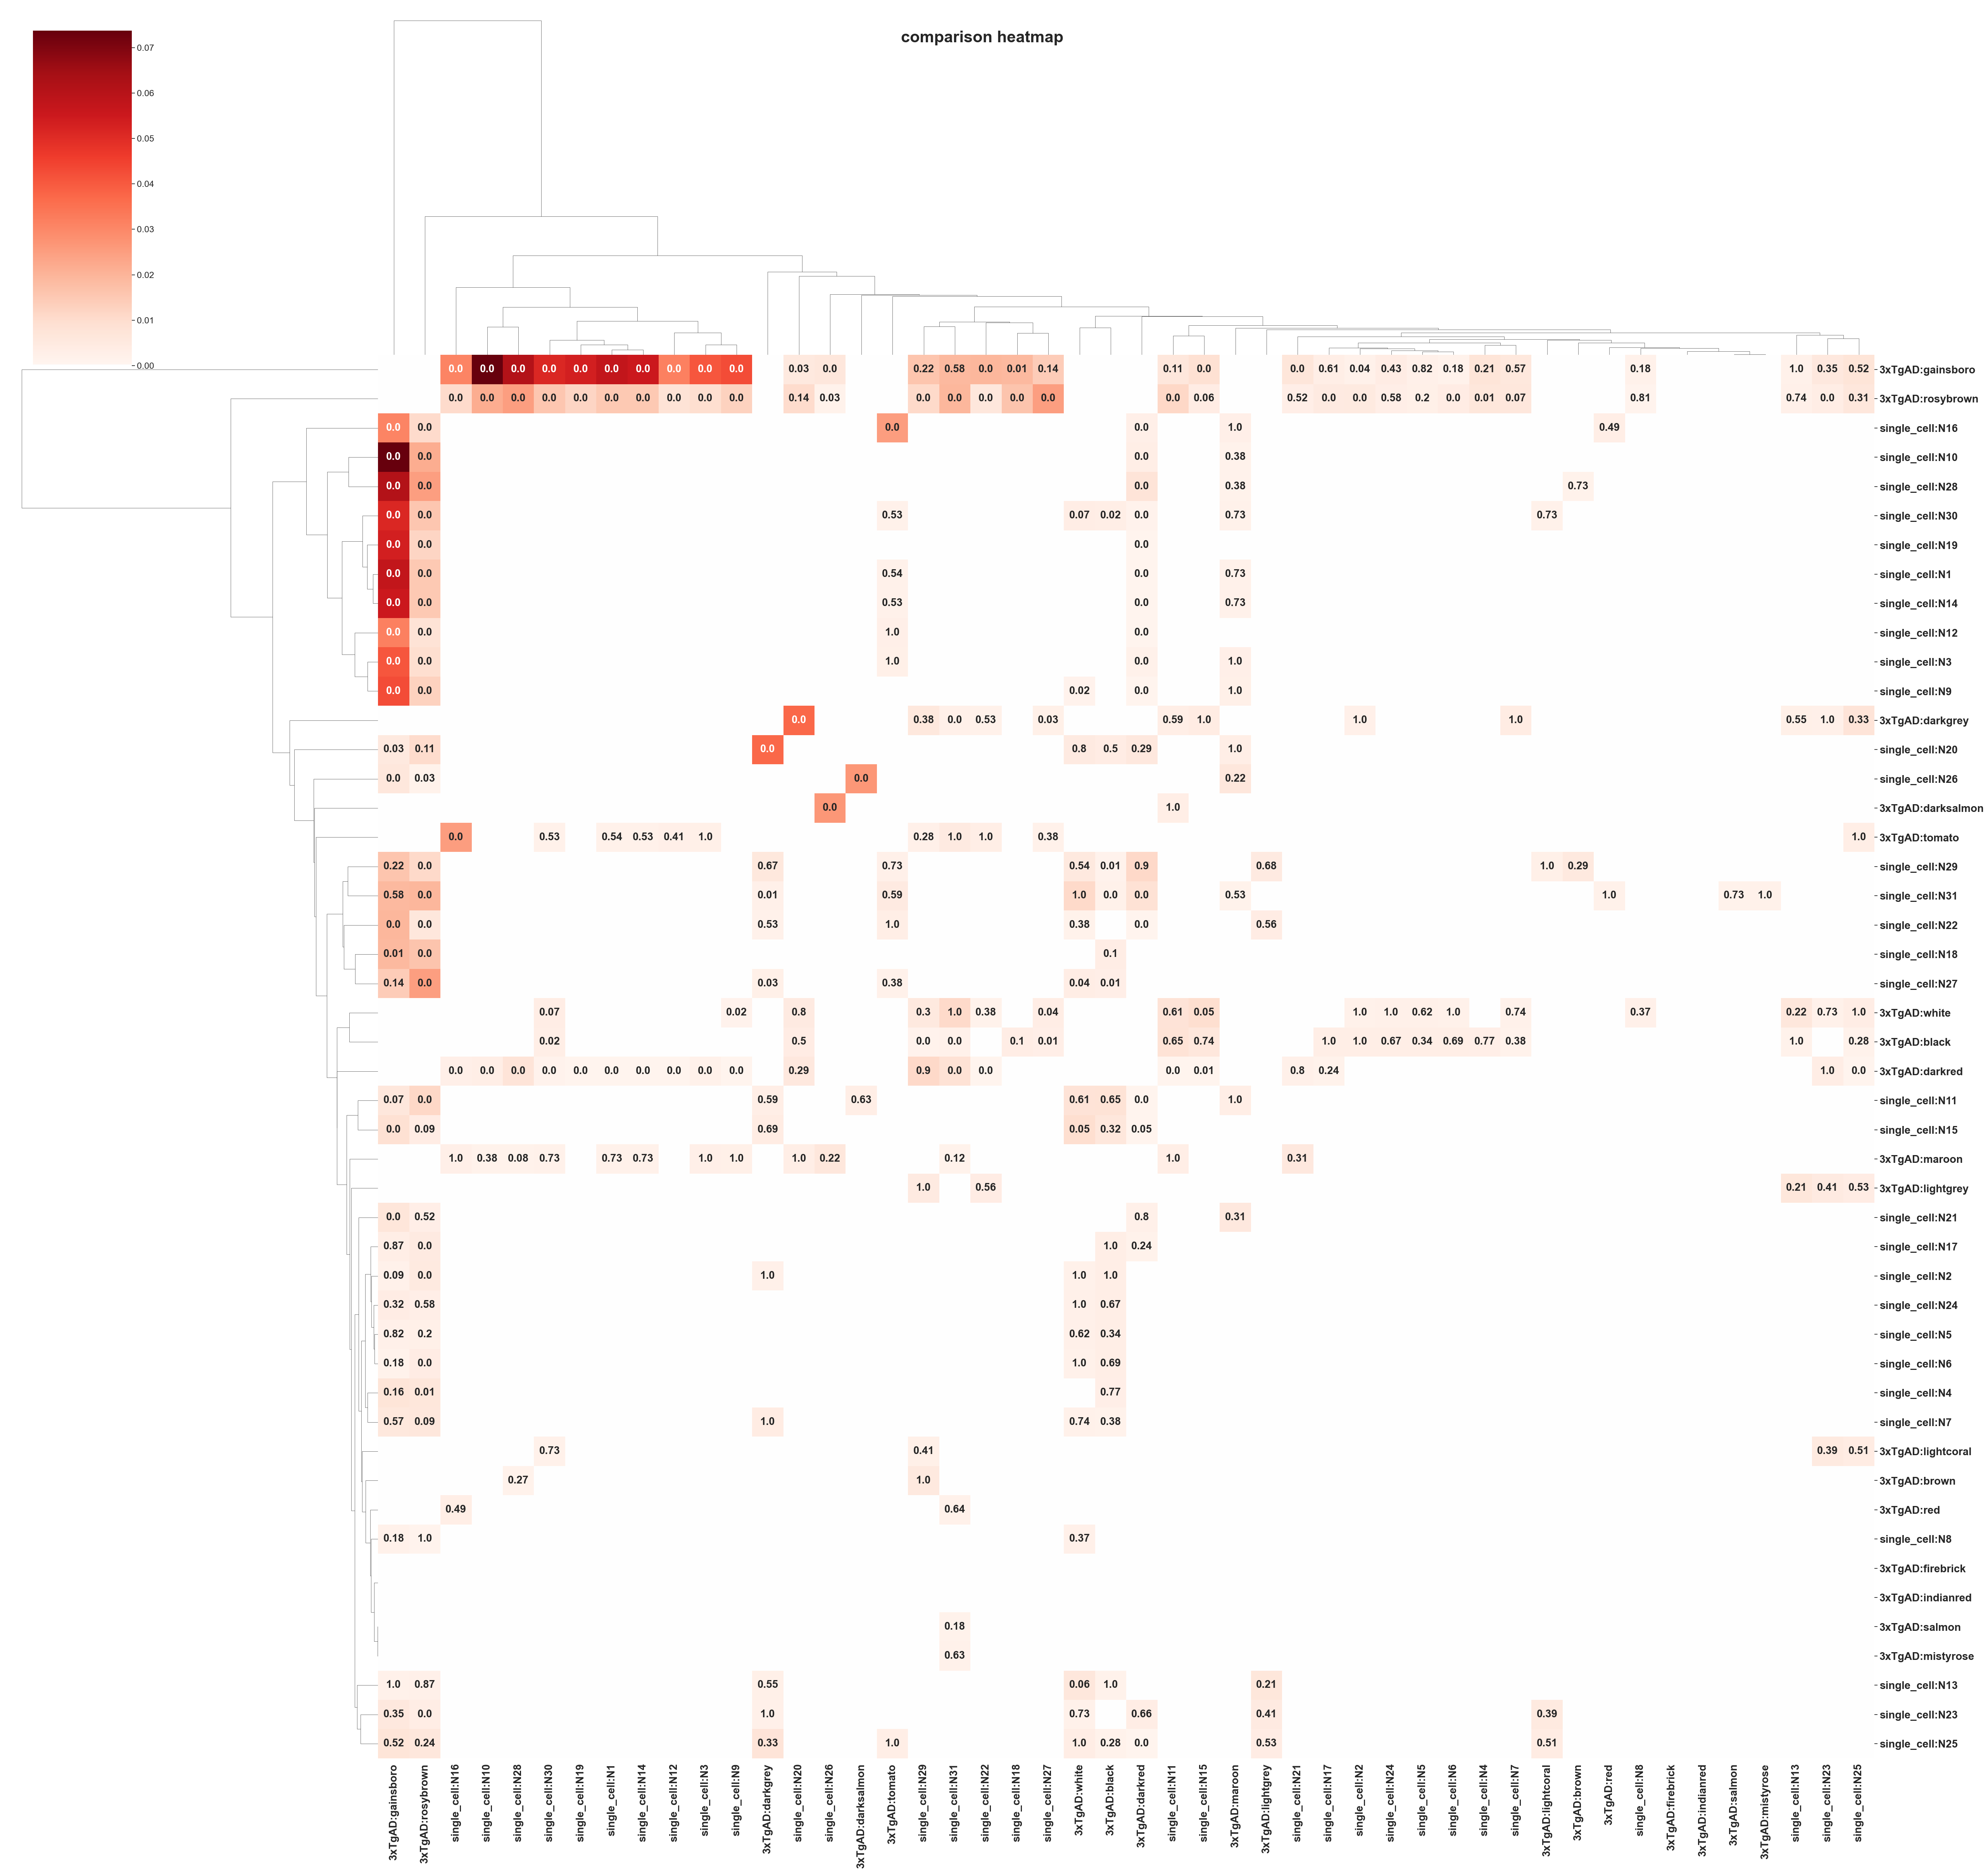

In [14]:
comparison.plotHeatmapComparison(plot_format="pdf",
                                 file_name="heatmap_comparison_3xTgAD_sn")

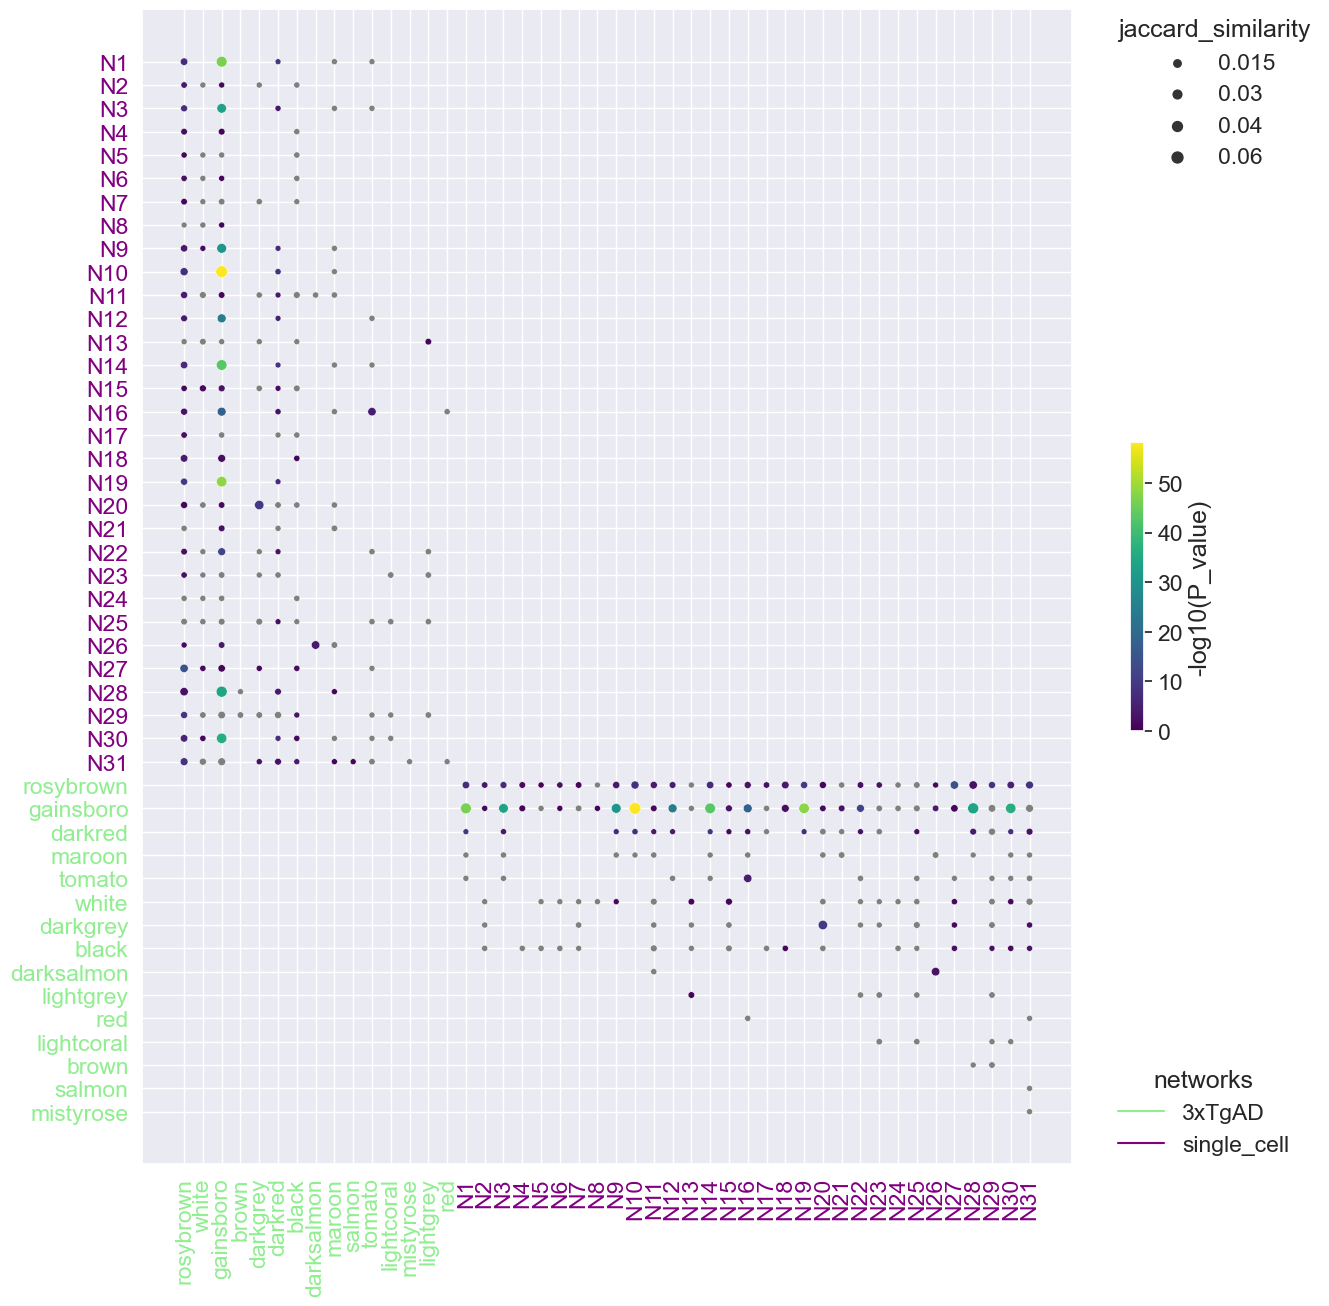

In [18]:
color = {"3xTgAD": "lightgreen", 
         "single_cell": "purple"}
comparison.plotBubbleComparison(color=color,
                                figsize=(15,15),
                                plot_format="pdf",
                                file_name="bubble_comparison_3xTgAD_sn")

## Saving and loading your comparison object
You can save or load your comparison object with `saveComparison()` or `readComparison()` functions respectively.

In [19]:
comparison.saveComparison(name="comparison_sn_3xTgAD")

Saving comparison as comparison_sn_3xTgAD.p


In [20]:
import PyWGCNA
comparison = PyWGCNA.readComparison('comparison_sn_3xTgAD.p')

Reading comparison done!
